use 'git lfs pull' fist to get data before use.

## first part process all data ( 2022-2023 taxi) to one file

In [7]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

# 指定数据文件夹路径
data_folder = 'origin_data'

# 创建一个字典来存储每种类型/年份的数据
data_dict = {
    'green_2022': [],
    'green_2023': [],
    'yellow_2022': [],
    'yellow_2023': []
}

# 获取所有的 .parquet 文件
parquet_files = glob.glob(os.path.join(data_folder, '*.parquet'))

# 遍历所有的 .parquet 文件
for file in parquet_files:
    # 读取文件
    df = pd.read_parquet(file, engine='pyarrow')  # 推荐使用pyarrow引擎

    # 根据文件名判断车辆类型和年份
    if 'green' in file and '2022' in file:
        data_dict['green_2022'].append(df)
    elif 'green' in file and '2023' in file:
        data_dict['green_2023'].append(df)
    elif 'yellow' in file and '2022' in file:
        data_dict['yellow_2022'].append(df)
    elif 'yellow' in file and '2023' in file:
        data_dict['yellow_2023'].append(df)

# 将每个数据集合并并保存为 .csv 文件
for key, dfs in data_dict.items():
    if dfs:  # 确保有数据
        combined_df = pd.concat(dfs, ignore_index=True)
        output_path = os.path.join('combined_data', f'{key}.csv')
        combined_df.to_csv(output_path, index=False)
        print(f"{output_path} 已生成，包含 {len(combined_df)} 条记录。")

print("数据整合完成！")



combined_data\green_2022.csv 已生成，包含 840402 条记录。
combined_data\green_2023.csv 已生成，包含 787060 条记录。
combined_data\yellow_2022.csv 已生成，包含 39656098 条记录。
combined_data\yellow_2023.csv 已生成，包含 38310226 条记录。
数据整合完成！


## 数据预处理

In [4]:
# 定义文件夹路径
input_folder = 'combined_data'

# 获取所有的 CSV 文件
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

# 统计分析函数
def analyze_data(df, file_name):
    print(f"\n📊 数据集统计分析：{file_name}\n")

    # 1. 数据概览
    print("🔹 数据集规模：")
    print(f" - 行数：{df.shape[0]}")
    print(f" - 列数：{df.shape[1]}")

    # 2. 每列的非空值数量及数据类型
    print("\n🔹 每列的非空值数量和数据类型：")
    print(df.info())

    # 3. 描述性统计
    print("\n🔹 基本统计信息：")
    print(df.describe())

    # 4. 缺失值统计
    print("\n🔹 缺失值统计：")
    print(df.isnull().sum())

    # 5. 关键列的分布情况（如存在）
    if 'trip_distance' in df.columns:
        print(f"\n🔹 行程距离分布 (trip_distance)：")
        print(df['trip_distance'].describe())

    if 'fare_amount' in df.columns:
        print(f"\n🔹 车费分布 (fare_amount)：")
        print(df['fare_amount'].describe())

    if 'passenger_count' in df.columns:
        print(f"\n🔹 乘客数量分布 (passenger_count)：")
        print(df['passenger_count'].value_counts().sort_index())

# 遍历每个 CSV 文件并进行统计分析
for file in csv_files:
    # 读取数据
    df = pd.read_csv(file)

    # 数据分析
    analyze_data(df, os.path.basename(file))

print("\n✅ 数据统计分析完成！")



📊 数据集统计分析：green_2022.csv

🔹 数据集规模：
 - 行数：840402
 - 列数：20

🔹 每列的非空值数量和数据类型：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840402 entries, 0 to 840401
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               840402 non-null  int64  
 1   lpep_pickup_datetime   840402 non-null  object 
 2   lpep_dropoff_datetime  840402 non-null  object 
 3   store_and_fwd_flag     750062 non-null  object 
 4   RatecodeID             750062 non-null  float64
 5   PULocationID           840402 non-null  int64  
 6   DOLocationID           840402 non-null  int64  
 7   passenger_count        750062 non-null  float64
 8   trip_distance          840402 non-null  float64
 9   fare_amount            840402 non-null  float64
 10  extra                  840402 non-null  float64
 11  mta_tax                840402 non-null  float64
 12  tip_amount             840402 non-null  float64
 13  tolls_amount 

C:\Users\New\AppData\Local\Temp\ipykernel_21496\1993363591.py:44: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



📊 数据集统计分析：green_2023.csv

🔹 数据集规模：
 - 行数：787060
 - 列数：20

🔹 每列的非空值数量和数据类型：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787060 entries, 0 to 787059
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               787060 non-null  int64  
 1   lpep_pickup_datetime   787060 non-null  object 
 2   lpep_dropoff_datetime  787060 non-null  object 
 3   store_and_fwd_flag     731447 non-null  object 
 4   RatecodeID             731447 non-null  float64
 5   PULocationID           787060 non-null  int64  
 6   DOLocationID           787060 non-null  int64  
 7   passenger_count        731447 non-null  float64
 8   trip_distance          787060 non-null  float64
 9   fare_amount            787060 non-null  float64
 10  extra                  787060 non-null  float64
 11  mta_tax                787060 non-null  float64
 12  tip_amount             787060 non-null  float64
 13  tolls_amount 

C:\Users\New\AppData\Local\Temp\ipykernel_21496\1993363591.py:44: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



📊 数据集统计分析：yellow_2022.csv

🔹 数据集规模：
 - 行数：39656098
 - 列数：19

🔹 每列的非空值数量和数据类型：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39656098 entries, 0 to 39656097
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory us

C:\Users\New\AppData\Local\Temp\ipykernel_21496\1993363591.py:44: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



📊 数据集统计分析：yellow_2023.csv

🔹 数据集规模：
 - 行数：38310226
 - 列数：20

🔹 每列的非空值数量和数据类型：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38310226 entries, 0 to 38310225
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float6

In [5]:
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))
for file in csv_files:
    # 读取数据
    df = pd.read_csv(file)

    # 打印文件名及其前5行数据
    print(f"\n📂 文件名: {os.path.basename(file)}")
    print(df.head(5))
    print("="*60)  # 分隔线，提升输出的清晰度


📂 文件名: green_2022.csv
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_a

C:\Users\New\AppData\Local\Temp\ipykernel_21496\141087258.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



📂 文件名: green_2023.csv
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_a

C:\Users\New\AppData\Local\Temp\ipykernel_21496\141087258.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



📂 文件名: yellow_2022.csv
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_

C:\Users\New\AppData\Local\Temp\ipykernel_21496\141087258.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



📂 文件名: yellow_2023.csv
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_

In [9]:

input_folder = 'combined_data'
output_folder = 'combined_data'  # 输出路径

# 读取两个数据集
green_2022 = pd.read_csv(os.path.join(input_folder, 'green_2022.csv'))
yellow_2022 = pd.read_csv(os.path.join(input_folder, 'yellow_2022.csv'))

# 重命名 green_2022 的列名
green_2022.rename(columns={
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

# 重命名 yellow_2022 的列名
yellow_2022.rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

# 合并两个数据集
combined_2022 = pd.concat([green_2022, yellow_2022], ignore_index=True)

# 将 'pickup_datetime' 和 'dropoff_datetime' 转换为时间格式
combined_2022['pickup_datetime'] = pd.to_datetime(combined_2022['pickup_datetime'], errors='coerce')
combined_2022['dropoff_datetime'] = pd.to_datetime(combined_2022['dropoff_datetime'], errors='coerce')

# 保存合并后的数据
output_file = os.path.join(output_folder, '2022.csv')
combined_2022.to_csv(output_file, index=False)

print(f"✅ {output_file} 已成功生成，包含 {len(combined_2022)} 条记录。")


C:\Users\New\AppData\Local\Temp\ipykernel_21496\3636713299.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  yellow_2022 = pd.read_csv(os.path.join(input_folder, 'yellow_2022.csv'))


✅ combined_data\2022.csv 已成功生成，包含 40496500 条记录。


In [10]:
print(combined_2022.head(10))

   VendorID     pickup_datetime    dropoff_datetime store_and_fwd_flag  \
0         2 2022-01-01 00:14:21 2022-01-01 00:15:33                  N   
1         1 2022-01-01 00:20:55 2022-01-01 00:29:38                  N   
2         1 2022-01-01 00:57:02 2022-01-01 01:13:14                  N   
3         2 2022-01-01 00:07:42 2022-01-01 00:15:57                  N   
4         2 2022-01-01 00:07:50 2022-01-01 00:28:52                  N   
5         1 2022-01-01 00:47:57 2022-01-01 00:54:09                  N   
6         2 2022-01-01 00:13:38 2022-01-01 00:33:50                  N   
7         2 2022-01-01 00:43:00 2022-01-01 00:49:20                  N   
8         2 2022-01-01 00:41:04 2022-01-01 00:47:04                  N   
9         2 2022-01-01 00:51:07 2022-01-01 01:09:31                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116    

In [11]:

input_folder = 'combined_data'
output_folder = 'combined_data'  # 输出路径

# 读取两个数据集
green_2023 = pd.read_csv(os.path.join(input_folder, 'green_2023.csv'))
yellow_2023 = pd.read_csv(os.path.join(input_folder, 'yellow_2023.csv'))

# 重命名 green_2022 的列名
green_2023.rename(columns={
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

# 重命名 yellow_2022 的列名
yellow_2023.rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

# 合并两个数据集
combined_2023 = pd.concat([green_2023, yellow_2023], ignore_index=True)

# 将 'pickup_datetime' 和 'dropoff_datetime' 转换为时间格式
combined_2023['pickup_datetime'] = pd.to_datetime(combined_2023['pickup_datetime'], errors='coerce')
combined_2023['dropoff_datetime'] = pd.to_datetime(combined_2023['dropoff_datetime'], errors='coerce')

# 保存合并后的数据
output_file = os.path.join(output_folder, '2023.csv')
combined_2023.to_csv(output_file, index=False)

print(f"✅ {output_file} 已成功生成，包含 {len(combined_2023)} 条记录。")


C:\Users\New\AppData\Local\Temp\ipykernel_21496\2154966350.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  green_2023 = pd.read_csv(os.path.join(input_folder, 'green_2023.csv'))
C:\Users\New\AppData\Local\Temp\ipykernel_21496\2154966350.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  yellow_2023 = pd.read_csv(os.path.join(input_folder, 'yellow_2023.csv'))


✅ combined_data\2023.csv 已成功生成，包含 40496500 条记录。


## 随机抽样1%

In [3]:

data_2022 = pd.read_csv('combined_data/2022.csv')

# 随机抽样 1% 数据（≈ 40万条）
sampled_data_2022 = data_2022.sample(frac=0.01, random_state=42)

# 保存抽样数据
sampled_data_2022.to_csv('combined_data/2022_sampled.csv', index=False)

C:\Users\New\AppData\Local\Temp\ipykernel_47000\3179705796.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv('combined_data/2022.csv')


In [4]:

data_2023 = pd.read_csv('combined_data/2023.csv')

# 随机抽样 1% 数据（≈ 40万条）
sampled_data_2023 = data_2023.sample(frac=0.01, random_state=42)

# 保存抽样数据
sampled_data_2023.to_csv('combined_data/2023_sampled.csv', index=False)


C:\Users\New\AppData\Local\Temp\ipykernel_47000\1339117811.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023 = pd.read_csv('combined_data/2023.csv')


In [5]:
import pandas as pd
import os

# 定义数据文件路径
input_folder = 'combined_data'
output_folder = 'combined_data'  # 输出仍保存在同一文件夹

# 定义要处理的文件
sampled_files = ['2022_sampled.csv', '2023_sampled.csv']

# 遍历文件并处理
for file in sampled_files:
    # 读取数据
    df = pd.read_csv(os.path.join(input_folder, file))

    # 检查是否存在时间列
    if 'pickup_datetime' in df.columns and 'dropoff_datetime' in df.columns:
        # 1. 转换时间列为 datetime 格式
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
        df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

        # 2. 删除无效的时间数据
        df.dropna(subset=['pickup_datetime', 'dropoff_datetime'], inplace=True)

        # 3. 删除 pickup > dropoff 的无效行程记录
        df = df[df['pickup_datetime'] <= df['dropoff_datetime']]

        # 5. 重置索引
        df.reset_index(drop=True, inplace=True)

        # 6. 重新保存清洗后的数据
        output_file = os.path.join(output_folder, file.replace('.csv', '_cleaned.csv'))
        df.to_csv(output_file, index=False)

        print(f"✅ {output_file} 已成功生成，保留 {len(df)} 条有效记录。")

    else:
        print(f"❗ 数据 '{file}' 中缺少 'pickup_datetime' 或 'dropoff_datetime' 列，请检查数据。")


✅ combined_data\2022_sampled_cleaned.csv 已成功生成，保留 404814 条有效记录。
✅ combined_data\2023_sampled_cleaned.csv 已成功生成，保留 390948 条有效记录。


## last data process

In [3]:
 # 读取数据（确保 CSV 中有 'pickup_datetime' 和 'dropoff_datetime' 列）
df_2022 = pd.read_csv('combined_data/2022_sampled_cleaned.csv', parse_dates=['pickup_datetime','dropoff_datetime'])
df_2023 = pd.read_csv('combined_data/2023_sampled_cleaned.csv', parse_dates=['pickup_datetime','dropoff_datetime'])
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定支持中文的字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题
# 2. 合并数据
df = pd.concat([df_2022, df_2023], ignore_index=True)

# 3. 确保时间列非空，并计算行程时长（分钟）
df.dropna(subset=['pickup_datetime', 'dropoff_datetime'], inplace=True)
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# 如果有可能出现负数或 0 分钟的异常记录，可以进一步过滤
df = df[df['trip_duration'] > 0]

# 4. 使用 IQR 方法过滤 trip_duration 的异常值
Q1 = df['trip_duration'].quantile(0.01)
Q3 = df['trip_duration'].quantile(0.99)
IQR = Q3 - Q1
k = 1.5  # IQR 倍数，可根据需求调整

lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# 保留正常范围内的数据
df = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

# 5. 此时 df 即为“行程时长异常值清洗后”的 DataFrame，可直接使用
print(f"处理后数据量: {len(df)} 行")
print(df[['pickup_datetime', 'dropoff_datetime', 'trip_duration']].head())


处理后数据量: 794512 行
      pickup_datetime    dropoff_datetime  trip_duration
0 2022-04-13 20:05:04 2022-04-13 20:08:32       3.466667
1 2022-11-24 13:14:48 2022-11-24 13:24:52      10.066667
2 2022-10-18 15:26:49 2022-10-18 16:07:57      41.133333
3 2022-11-20 02:32:01 2022-11-20 02:36:39       4.633333
4 2022-09-30 07:46:58 2022-09-30 07:52:18       5.333333


below is the analysis

处理后数据量: 794512 行
      pickup_datetime    dropoff_datetime  trip_duration
0 2022-04-13 20:05:04 2022-04-13 20:08:32       3.466667
1 2022-11-24 13:14:48 2022-11-24 13:24:52      10.066667
2 2022-10-18 15:26:49 2022-10-18 16:07:57      41.133333
3 2022-11-20 02:32:01 2022-11-20 02:36:39       4.633333
4 2022-09-30 07:46:58 2022-09-30 07:52:18       5.333333
      trip_count  avg_duration
hour                          
0          11612     13.898925
1           5942     12.873965
2           3438     12.121078
3           2082     12.215186
4           2002     15.368690
5           3708     15.120011
6           9784     15.132953
7          19793     15.393880
8          25870     16.009174
9          27706     16.330157
10         28658     16.676881
11         29429     17.331138
12         31544     17.448462
13         32443     17.776198
14         35167     18.949114
15         36571     19.323099
16         36346     19.416552
17         40369     17.698499
18         42678     

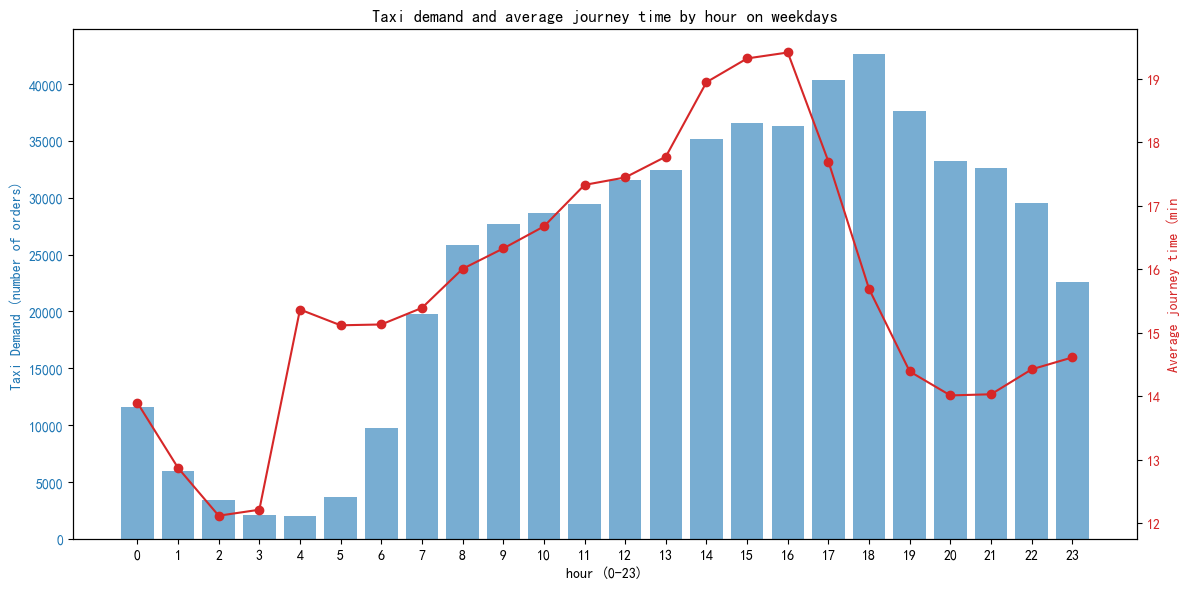

In [ ]:

# 计算每笔行程的持续时间（单位：分钟）
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# 提取工作日和小时信息
# weekday：0表示周一，...，6表示周日
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

# 筛选工作日数据（周一到周五）
working_df = df[df['weekday'] < 5]

# 按小时分组，统计订单数量和平均行程时长
hourly_stats = working_df.groupby('hour').agg(
    trip_count=('pickup_datetime', 'count'),
    avg_duration=('trip_duration', 'mean')
)

print(hourly_stats)

# 绘图：左轴显示订单数量（柱状图），右轴显示平均行程时长（折线图）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：出租车需求（订单数量）
color1 = 'tab:blue'
ax1.set_xlabel('hour (0-23)')
ax1.set_ylabel('Taxi Demand (number of orders)', color=color1)
ax1.bar(hourly_stats.index, hourly_stats['trip_count'], color=color1, alpha=0.6, label='订单数')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(range(0, 24))

# 右轴：平均行程时长
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Average journey time (min', color=color2)
ax2.plot(hourly_stats.index, hourly_stats['avg_duration'], marker='o', color=color2, label='平均时长')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Taxi demand and average journey time by hour on weekdays')
fig.tight_layout()
plt.show()

===== Weekend Stats =====
      trip_count  avg_duration
hour                          
0          10622     14.091908
1           8978     12.877616
2           6465     11.867187
3           4454     11.925490
4           2472     12.612891
5           1236     15.356702
6           1872     14.830823
7           2821     13.066537
8           4377     12.545137
9           6803     11.987148
10          9263     12.823615
11         10686     13.850803
12         12147     14.770983
13         12698     15.863589
14         12866     16.845338
15         12866     17.253981
16         13190     17.518308
17         13448     16.935569
18         13638     16.295939
19         12576     15.687342
20         10857     15.220266
21         10416     14.864459
22         10025     15.244028
23          8921     15.172139


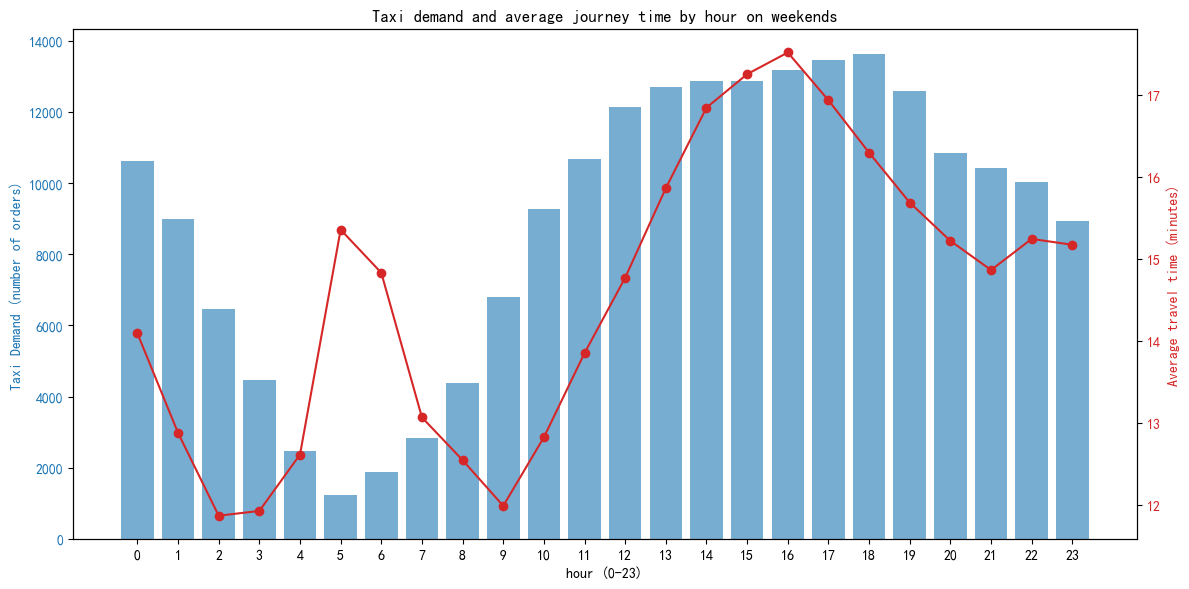

In [15]:
weekend_df = df[df['weekday'] >= 5]

# 按小时分组，统计订单数量 (trip_count) 和平均行程时长 (avg_duration)
hourly_stats_weekend = weekend_df.groupby('hour').agg(
    trip_count=('pickup_datetime', 'count'),
    avg_duration=('trip_duration', 'mean')
)

print("===== Weekend Stats =====")
print(hourly_stats_weekend)

# 绘图：左轴显示订单数，右轴显示平均行程时长
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：出租车需求（订单数量）
color1 = 'tab:blue'
ax1.set_xlabel('hour'' (0-23)')
ax1.set_ylabel('Taxi Demand (number of orders)', color=color1)
ax1.bar(hourly_stats_weekend.index, hourly_stats_weekend['trip_count'], 
        color=color1, alpha=0.6, label='number of orders')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(range(0, 24))

# 右轴：平均行程时长
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Average travel time (minutes)', color=color2)
ax2.plot(hourly_stats_weekend.index, hourly_stats_weekend['avg_duration'], 
         marker='o', color=color2, label='average time')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Taxi demand and average journey time by hour on weekends')
fig.tight_layout()
plt.show()

## Zone analysis

Taxi Zone Lookup 预览：
   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone
2022年各行政区订单数：
         Borough  trip_count
0          Bronx         777
1       Brooklyn        4247
2            EWR          90
3      Manhattan      357026
4         Queens       36956
5  Staten Island          19
6        Unknown        4930
2023年各行政区订单数：
         Borough  trip_count
0          Bronx         783
1       Brooklyn        4047
2            EWR          40
3      Manhattan      342492
4         Queens       39684
5  Staten Island          29
6        Unknown        3599
合并后的对比数据：
         Borough  trip_count_2022  trip_count_2023
0          Bronx        

C:\Users\New\AppData\Local\Temp\ipykernel_30684\2748426109.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


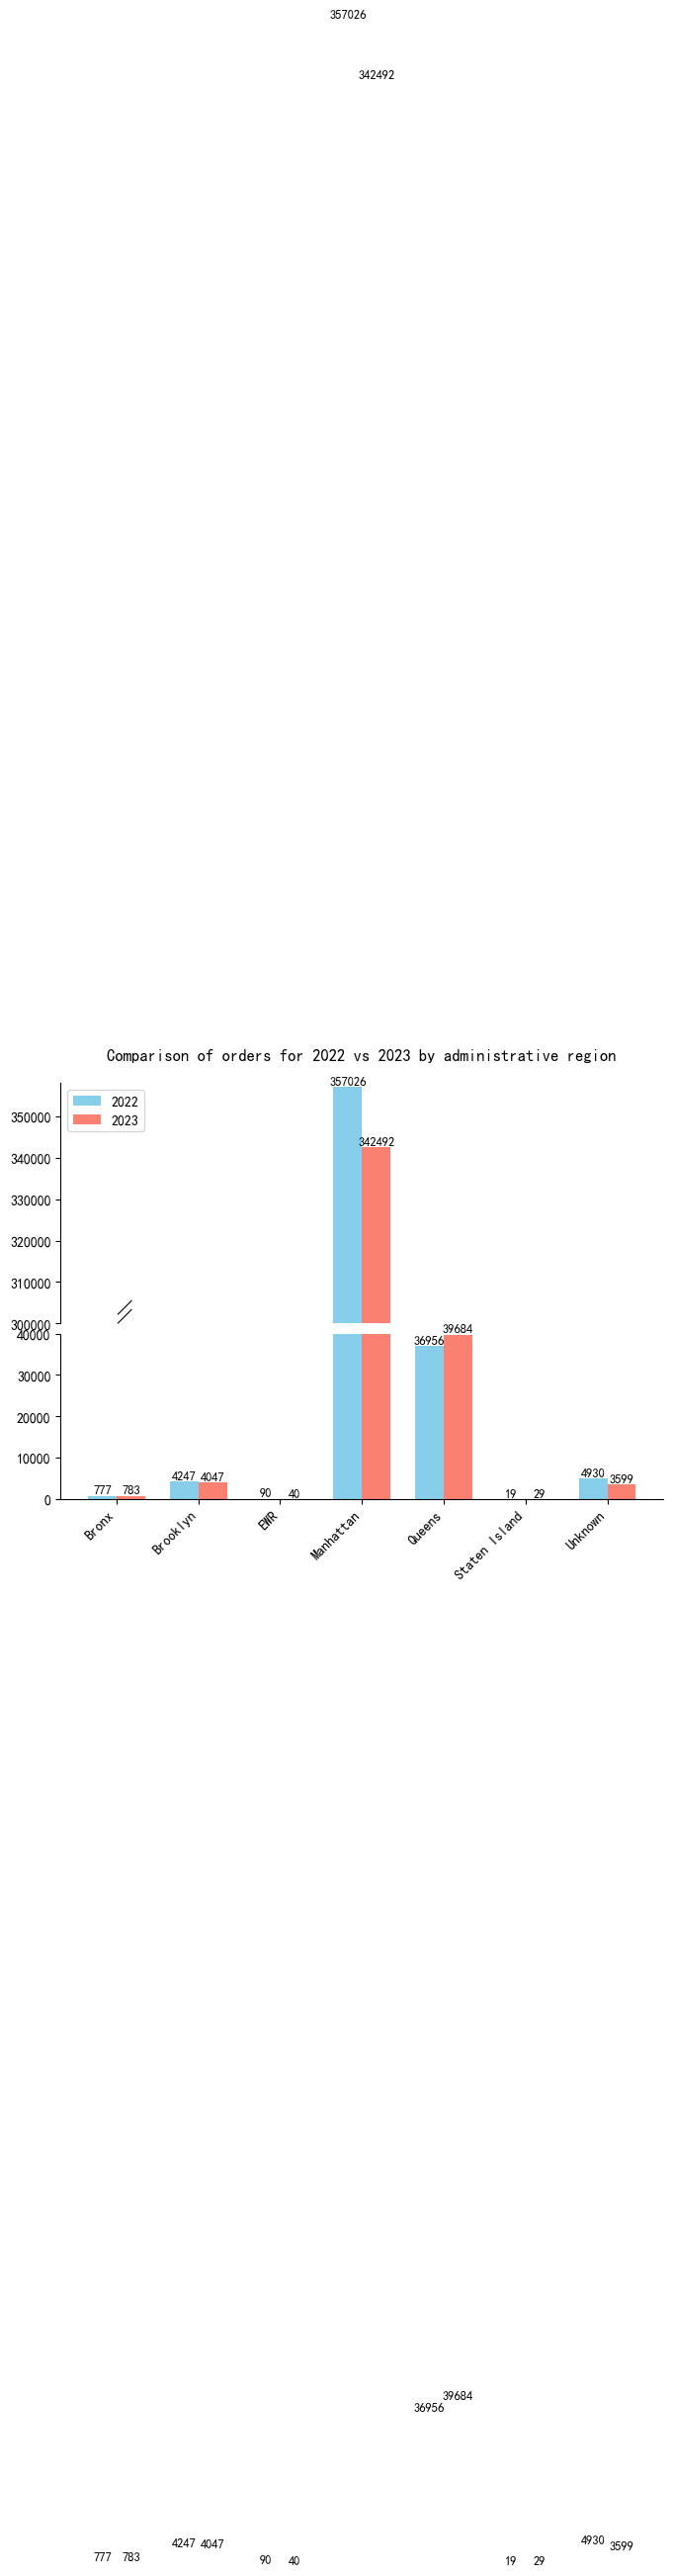

In [21]:

from brokenaxes import brokenaxes

# 1. 读取 taxi_zone_lookup.csv（包含区域代码对应的 Borough 信息）
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
print("Taxi Zone Lookup 预览：")
print(zone_lookup.head())

# --------------------------
# 2. 分别读取2022年和2023年的数据
# --------------------------
df_2022 = pd.read_csv('combined_data/2022_sampled_cleaned.csv', parse_dates=['pickup_datetime'])
df_2023 = pd.read_csv('combined_data/2023_sampled_cleaned.csv', parse_dates=['pickup_datetime'])

# --------------------------
# 3. 将数据与区域查找表关联（基于 PULocationID 对应 LocationID），只关注 Borough 信息
# --------------------------
df_2022 = df_2022.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
df_2023 = df_2023.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

# --------------------------
# 4. 按 Borough 统计订单数（出租车需求）
# --------------------------
borough_2022 = df_2022.groupby('Borough').agg(trip_count=('pickup_datetime', 'count')).reset_index()
borough_2023 = df_2023.groupby('Borough').agg(trip_count=('pickup_datetime', 'count')).reset_index()

print("2022年各行政区订单数：")
print(borough_2022)
print("2023年各行政区订单数：")
print(borough_2023)

# --------------------------
# 5. 合并两个年份的数据，便于比较
# --------------------------
df_compare = pd.merge(
    borough_2022, 
    borough_2023, 
    on='Borough', 
    how='outer', 
    suffixes=('_2022', '_2023')
).fillna(0)

# 对 Borough 进行排序（按字母或你希望的顺序）
df_compare = df_compare.sort_values(by='Borough')
print("合并后的对比数据：")
print(df_compare)

# --------------------------
# 6. 计算增长率 (相对于 2022)
# --------------------------
df_compare['growth_rate'] = (
    (df_compare['trip_count_2023'] - df_compare['trip_count_2022']) 
    / df_compare['trip_count_2022'].replace(0, np.nan)  # 避免除以0
) * 100

print("\n各行政区的增长率（相对于2022年，单位：%）：")
for idx, row in df_compare.iterrows():
    # 若 2022 订单数为 0，则增长率为 NaN，可特殊处理
    if pd.isna(row['growth_rate']):
        print(f"{row['Borough']}: 2022年订单数为0，无法计算增长率")
    else:
        print(f"{row['Borough']}: {row['growth_rate']:.2f}%")

# --------------------------
# 7. 使用断轴绘制对比柱状图
# --------------------------
# 提取数据
boroughs = df_compare['Borough']
trip_2022 = df_compare['trip_count_2022']
trip_2023 = df_compare['trip_count_2023']

# 计算最大值，以便确定断轴的区间
max_count = max(trip_2022.max(), trip_2023.max())

# 根据数据特征设定断轴的上下区间（根据需要调整）
threshold_low = 40000  # 下部分上限
upper_lower = 300000  # 上部分下界
upper_upper = max_count + 1000  # 上部分上界

# 创建断轴图（两个 y 轴段）
bax = brokenaxes(ylims=((0, threshold_low), (upper_lower, upper_upper)), hspace=.05)

x = np.arange(len(boroughs))
width = 0.35

# 绘制 2022 年和 2023 年的柱状图
bax.bar(x - width/2, trip_2022, width, label='2022', color='skyblue')
bax.bar(x + width/2, trip_2023, width, label='2023', color='salmon')


# 设置 x 轴刻度和标签（两个轴都需要设置）
for ax in bax.axs:
    ax.set_xticks(x)
    ax.set_xticklabels(boroughs, rotation=45, ha="right")

# 遍历每个子轴上的所有柱形，并在柱顶显示对应的数字
for ax in bax.axs:
    for rect in ax.patches:
        height = rect.get_height()
        # 增加一定偏移量，防止数字与柱顶重叠，这里设为 200，根据数据实际情况调整
        offset = 10
        ax.text(rect.get_x() + rect.get_width()/2, height + offset, f'{int(height)}',
                ha='center', va='bottom', fontsize=9)
# 添加图例
bax.legend(loc='upper left')

plt.suptitle('Comparison of orders for 2022 vs 2023 by administrative region')
plt.tight_layout()
plt.show()